<a href="https://colab.research.google.com/github/bundickm/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
import requests
import bs4

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'
result = requests.get(url)

In [0]:
soup = bs4.BeautifulSoup(result.text)

In [16]:
first = soup.select('h2')[0]
first

<h2>
<a href="/2019/schedule/presentation/235/" id="presentation-235">
        5 Steps to Build Python Native GUI Widgets for BeeWare
      </a>
</h2>

In [21]:
first.text.strip()

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [22]:
last = soup.select('h2')[-1]
last.text.strip()

"Working with Time Zones: Everything You Wish You Didn't Need to Know"

In [0]:
###Orginal For Loop###
#for tag in soup.select('h2'):
#  titles.append(tag.text.strip())

#list comprehension
titles = [tag.text.strip() for tag in soup.select('h2')]

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [31]:
long_titles = []

for title in titles:
  if len(title) > 80:
    long_titles.append(title)

long_titles    

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 2. List Comprehension

In [35]:
long_titles = [title for title in titles if (len(title) > 80)]
long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 3. Filter with named function

In [41]:
def long(title):
  return len(title) > 80

long_titles = list(filter(long, titles))
long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 4. Filter with anonymous function

In [43]:
list(filter(lambda title: len(title) > 80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [46]:
df = pd.DataFrame({'title':titles})
df.head()

,title
0,5 Steps to Build Python Native GUI Widgets for BeeWare
1,8 things that happen at the dot: Attribute Access & Descriptors
2,Account Security Patterns: How Logged-In Are you?
3,Ace Your Technical Interview Using Python
4,Advanced asyncio: Solving Real-world Production Problems


In [47]:
df[df['title'].str.len() > 80]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [50]:
df['title length'] = df['title'].apply(len)
df.head()

,title,title length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


### long title

In [53]:
df['is long title'] = df['title length'] > 80
df.head()

,title,title length,is long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


### first letter

In [56]:
df['first char'] = df['title'].str[0]
df.head()

,title,title length,is long title,first char
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8
2,Account Security Patterns: How Logged-In Are you?,49,False,A
3,Ace Your Technical Interview Using Python,41,False,A
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A


In [58]:
%t df[ df['first char'] == 'P']

UsageError: Line magic function `%t` not found.


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [59]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 1.2MB/s 


In [0]:
import textstat

In [63]:
df['title word count'] = df['title'].apply(textstat.lexicon_count)
df.head()

,title,title length,is long title,first char,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [64]:
df = df.rename(columns={'title length':'title char count'})
df.head()

,title,title char count,is long title,first char,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [68]:
df.describe(include='number')

,title char count,title word count
count,95.000000,95.000000
mean,51.347368,7.978947
std,17.729509,3.218890
min,20.000000,2.000000
25%,37.000000,6.000000
50%,52.000000,7.000000
75%,62.000000,9.500000
max,95.000000,19.000000


In [69]:
df.describe(exclude='number')

,title,is long title,first char
count,95,95,95
unique,95,2,22
top,Lowering the Stakes of Failure with Pre-mortems and Post-mortems,False,T
freq,1,87,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [74]:
df.sort_values(by='title char count').head(5)['title']

64        Practical decorators
68       Python Security Tools
89     Type hinting (and mypy)
82     The Zen of Python Teams
56    Measuring Model Fairness
Name: title, dtype: object

Titles sorted reverse alphabetically

In [76]:
df.sort_values(by='first char', ascending=False).head()

,title,title char count,is long title,first char,title word count
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,12
88,to GIL or not to GIL: the Future of Multi-Core (C)Python,56,False,t,11
94,Working with Time Zones: Everything You Wish You Didn't Need to Know,68,False,W,12
93,Wily Python: Writing simpler and more maintainable Python,57,False,W,8
92,What's new in Python 3.7,24,False,W,5


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [77]:
df['first char'].value_counts()

T    12
A    11
M     8
P     8
E     7
B     6
S     6
H     5
L     4
D     4
G     4
W     4
F     3
C     3
I     2
R     2
¡     1
O     1
8     1
t     1
5     1
U     1
Name: first char, dtype: int64

Percentage of talks with long titles

In [78]:
df['is long title'].value_counts() / len(df)

False    0.915789
True     0.084211
Name: is long title, dtype: float64

In [79]:
df['is long title'].value_counts(normalize=True)

False    0.915789
True     0.084211
Name: is long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

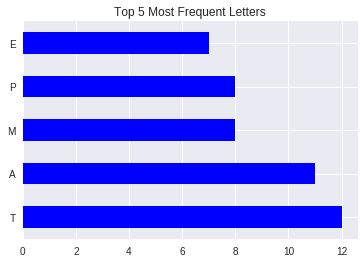

In [87]:
df['first char'].value_counts().head(5).plot.barh(color='b',title='Top 5 Most Frequent Letters');

Histogram of title lengths, in characters

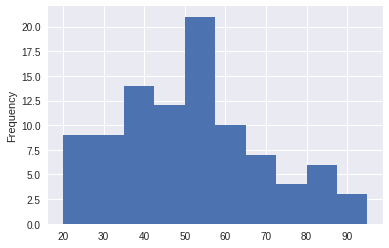

In [88]:
df['title char count'].plot.hist();

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?

###Scrape the talk descriptions. Hint: soup.select('.presentation-description')

In [0]:
#imports and aliasing
import requests
import textstat
import bs4
import pandas as pd

#setting display options
pd.options.display.max_colwidth = 100

In [0]:
#pull the html with requests
url = 'https://us.pycon.org/2019/schedule/talks/list/'
result = requests.get(url)

In [314]:
#dump html into soup and verify
pycon_soup = bs4.BeautifulSoup(result.text)
type(pycon_soup)

bs4.BeautifulSoup

In [315]:
#pull presentation descriptions from pycon_soup and make a list of descriptions
descriptions = [description.text 
                for description in pycon_soup
                .select('.presentation-description')]
descriptions[0] #verify

"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps."

###Make new columns in the dataframe:

*    description
*    description character count
*    description word count


In [316]:
#copying the poorly named DataFrame from lecture
pycon_2019_talks = df.copy()
pycon_2019_talks.head()

,title,title char count,is long title,first char,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [317]:
#adding the descriptions to pycon_2019_talks

#pycon_2019_talks['description'] = descriptions   #old description addition

#Adding each description after splitting and rejoining to remove extra spaces
pycon_2019_talks['description'] = [(' '.join(description.split())) 
                                   for description in descriptions]
pycon_2019_talks.head()

,title,title char count,is long title,first char,title word count,description
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,Have you ever wanted to write a GUI application in Python that you can run on both your laptop a...
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lo..."
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,Account security means making sure your users are only ones who can access their accounts. Accou...
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because...
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just ..."


In [305]:
#adding the description character count
pycon_2019_talks['description char count'] = pycon_2019_talks['description'].apply(len)
pycon_2019_talks.head()

,title,title char count,is long title,first char,title word count,description,description char count,description word count,tweetable description,kincaid rating
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,Have you ever wanted to write a GUI application in Python that you can run on both your laptop a...,766,135,False,9.7
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lo...",298,56,False,10.7
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,Account security means making sure your users are only ones who can access their accounts. Accou...,428,66,False,8.5
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because...,508,84,False,11.8
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just ...",647,96,False,9.5


In [306]:
#Adding the description word count with textstat
pycon_2019_talks['description word count'] = (pycon_2019_talks['description']
                                              .apply(textstat.lexicon_count))
pycon_2019_talks.head()

,title,title char count,is long title,first char,title word count,description,description char count,description word count,tweetable description,kincaid rating
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,Have you ever wanted to write a GUI application in Python that you can run on both your laptop a...,766,135,False,9.7
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lo...",298,56,False,10.7
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,Account security means making sure your users are only ones who can access their accounts. Accou...,428,66,False,8.5
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because...,508,84,False,11.8
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just ...",647,96,False,9.5


###Describe all the dataframe's columns
* Average description word count?
* Minimum?
* Maximum?

In [307]:
pycon_2019_talks.describe()

,title char count,title word count,description char count,description word count,kincaid rating
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,51.347368,7.978947,813.789474,130.821053,11.448421
std,17.729509,3.218890,416.074535,64.357872,2.963532
min,20.000000,2.000000,122.000000,20.000000,5.600000
25%,37.000000,6.000000,543.500000,85.500000,9.500000
50%,52.000000,7.000000,719.000000,116.000000,11.100000
75%,62.000000,9.500000,1017.000000,165.000000,13.100000
max,95.000000,19.000000,2827.000000,421.000000,19.600000


In [308]:
pycon_2019_talks.describe(exclude='number')

,title,is long title,first char,description,tweetable description
count,95,95,95,95,95
unique,95,2,22,95,2
top,Lowering the Stakes of Failure with Pre-mortems and Post-mortems,False,T,Using the pandas python library requires a shift in thinking that is not always intuitive to tho...,False
freq,1,87,12,1,94


###Answer the question: Which descriptions could fit in a tweet?

In [309]:
#New column with whether a description is tweetable
max_tweet_length = 280
pycon_2019_talks['tweetable description'] = (pycon_2019_talks
                                             ['description char count'] 
                                             <= max_tweet_length)

pycon_2019_talks[pycon_2019_talks['tweetable description']] #verify with masking

,title,title char count,is long title,first char,title word count,description,description char count,description word count,tweetable description,kincaid rating
54,"Making Music with Python, SuperCollider and FoxDot",50,False,M,7,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in t...",122,20,True,7.2


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [318]:
#new column with flesch kincaid grade level rating
pycon_2019_talks['kincaid rating'] = (pycon_2019_talks['description']
                                      .apply(textstat.flesch_kincaid_grade))
pycon_2019_talks.head()

,title,title char count,is long title,first char,title word count,description,kincaid rating
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,Have you ever wanted to write a GUI application in Python that you can run on both your laptop a...,9.7
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lo...",10.7
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,Account security means making sure your users are only ones who can access their accounts. Accou...,8.5
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because...,11.8
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just ...",9.5


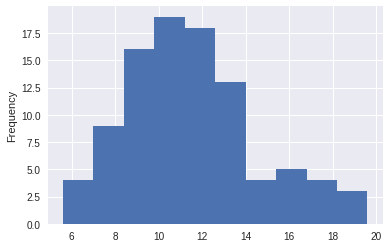

In [319]:
#hist showing outliers at extremely high grade levels
pycon_2019_talks['kincaid rating'].plot.hist();

In [320]:
#remaining high kincaid ratings appear to be from links. 
test = list(pycon_2019_talks[pycon_2019_talks['kincaid rating'] > 19]['description'])
test[0]

"Serverless computing is all about paying only for what you use: it can scale up to handle millions of requests, but it can also scale down to 0, costing you nothing if your application is not receiving any traffic. Serverless tends to get expensive when databases are involved.... but if your data is static or changes infrequently, you can use serverless tools to provide powerful interactive APIs extremely cheaply. [Datasette](https://datasette.readthedocs.io/) is an open-source Python tool that provides an instant, read-only JSON API for any SQLite database. It also provides tools for packaging the database up as a Docker container and instantly deploying that container to a number of different serverless hosting platforms. This makes it a powerful tool for sharing interesting data online, in a way that allows users to both explore that data themselves and build their own interpretations of the data using the Datasette JSON API. In this session I'll show you how to use Datasette to pu

###Everything Below is Working Through the kincaid problem
updated description at point of addition to df above so all this is not necessary

In [282]:
#identify one of the problems in high rating descriptions and test replace
test = list(pycon_2019_talks[pycon_2019_talks['kincaid rating'] > 75]['description'])
test[0]

"If we knew all of the bugs we needed to write tests for, wouldn't we just... not write the bugs?  So how can testing find bugs that nobody would think of?\r\n\r\nThe answer is to have a computer *write your tests for you!*  You declare what kind of input should work - from 'an integer' to 'matching this regex' to 'this Django model' and write a test which should always pass... then Hypothesis searches for the smallest inputs that cause an error.\r\n\r\nIf you’ve ever written tests that didn't find all your bugs, this talk is for you.  We'll cover the theory of property-based testing, a worked example, and then jump into a whirlwind tour of the library: how to use, define, compose, and infer strategies for input; properties and testing tactics for your code; and how to debug your tests if everything seems to go wrong.\r\n\r\nBy the end of this talk, you'll be ready to find real bugs with Hypothesis in anything from web apps to big data pipelines to CPython itself.  Be the change you wa

In [283]:
for index in range(len(pycon_2019_talks['description'])):
  pycon_2019_talks['description'][index] = ' '.join(pycon_2019_talks['description'][index].split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [285]:
test = list(pycon_2019_talks[pycon_2019_talks['kincaid rating'] > 75]['description'])
test[0]

"If we knew all of the bugs we needed to write tests for, wouldn't we just... not write the bugs? So how can testing find bugs that nobody would think of? The answer is to have a computer *write your tests for you!* You declare what kind of input should work - from 'an integer' to 'matching this regex' to 'this Django model' and write a test which should always pass... then Hypothesis searches for the smallest inputs that cause an error. If you’ve ever written tests that didn't find all your bugs, this talk is for you. We'll cover the theory of property-based testing, a worked example, and then jump into a whirlwind tour of the library: how to use, define, compose, and infer strategies for input; properties and testing tactics for your code; and how to debug your tests if everything seems to go wrong. By the end of this talk, you'll be ready to find real bugs with Hypothesis in anything from web apps to big data pipelines to CPython itself. Be the change you want to see in your codebas

In [0]:
#reset kincaid rating
pycon_2019_talks['kincaid rating'] = (pycon_2019_talks['description']
                                      .apply(textstat.flesch_kincaid_grade))

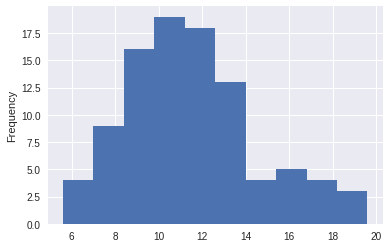

In [287]:
#look at hist again, fewer outliers but still issues
pycon_2019_talks['kincaid rating'].plot.hist();

In [292]:
test = list(pycon_2019_talks[pycon_2019_talks['kincaid rating'] > 12]['description'])
for i in range(35):
  print(test[i])

We will look into a day in the life of a Software Engineer with limited vision to Understand their difficulties at work and how they can overcome those difficulties to become successful in their role. I am a backend Software Engineer at Yelp who uses Python extensively for building Yelps infrastructure and internal tools. I also suffer from a genetic disorder called Albinism which often results in limited visual acuity that can range from 20/120 to 20/200 in most common cases. With such a low vision it's extremely difficult to read the computer screen without the use of on-screen magnifiers. In this talk, we will see how a person with adverse visual acuity can thrive and be successful in the field of Software Engineering. We will address the importance and meaning of accessibility for Software Engineers with partial vision and recommend some best practices that are available today. We will also talk about the importance of an inclusive work culture that can help foster creativity and e

IndexError: ignored